In [30]:
import pandas as pd 
import numpy as np 
#시각화
import matplotlib.pyplot as plt
import seaborn as sns

#경고무시
import sys
import warnings

import warnings
warnings.filterwarnings('ignore')

# 맥 폰트 불러오기
import matplotlib 
matplotlib.font_manager._rebuild()

plt.rcParams['font.family'] = 'AppleGothic' # 맥(Mac) 사용자
# plt.rcParams['font.family'] = 'Malgun Gothic'  # (Windows 용) 한글 출력을 위한 글꼴 설정
# plt.rcParams['axes.unicode_minus'] = False    # 문자 - (마이너스) 정상 출력을 위한 코드

In [2]:
df_ori = pd.read_csv('./팀_basline_csv.csv', encoding='utf-8')

In [3]:
df=df_ori.copy()
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y,금요일,주중,1,406
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,N,금요일,주중,1,13
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,N,금요일,주중,1,13
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,N,금요일,주중,1,13
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y,금요일,주중,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...
1461,Yves Saint Laurent,logo point clutch bag pink,a119721,2019-04-10,2021-03-01,7days,BA,Y,공휴일,휴일,3,691
1462,Prada,saffiano lux M gray,a1146069,2021-02-11,2021-03-01,7days,BA,Y,공휴일,휴일,3,18
1463,Burberry,basic pattern sweater beige,a1147848,2021-02-28,2021-03-01,7days,T,Y,공휴일,휴일,3,1
1464,Chanel,graphics pattern sweat-shirts white,a1147788,2021-02-28,2021-03-01,7days,T,Y,공휴일,휴일,3,1


>**(1).brandnm: 아이템의 브랜드 이름 컬럼 : 범주형 <br>
(2).goodsnm : 아이템의 특성을 담은 이름 컬럼 : 범주형 <br>
(3). USER : 사용자 ID 컬럼 : 범주형 <br>
(4). reg_date : 사용자 가입일 컬럼 : 날짜형 <br>
(5). order_date : 아이템 주문일 컬럼 : 날짜형<br>
(6). p_type : 주문 상품권 종류 5일 7일 : 범주형<br>
(7). sub_type : 주문 아이템 카테고리 : 범주형 <br>
(8). add_yn : 사용자의 어플리케이션 사용 여부 : 범주형**

# Acquisition

## 어떻게 많은 고객을 서비스로 유입시킬 수 있을 것인가? 

### 1. 전체 브랜드 중 선호도가 높은 순위

In [4]:
# print(df.brandnm.unique())
# print('='*30)
print('클로젯쉐어 전체 브랜드 분류 수 :', len(df.brandnm.unique()))

클로젯쉐어 전체 브랜드 분류 수 : 245


In [5]:
df.groupby('brandnm').count()

,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
brandnm,,,,,,,,,,,
& Other Stories,8,8,8,8,8,8,8,8,8,8,8
A BY A,1,1,1,1,1,1,1,1,1,1,1
A.P.C.,3,3,3,3,3,3,3,3,3,3,3
ACNE STUDIOS,4,4,4,4,4,4,4,4,4,4,4
Adidas,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
Zooc,2,2,2,2,2,2,2,2,2,2,2
cecilie bahnsen,1,1,1,1,1,1,1,1,1,1,1
khrisjoy,1,1,1,1,1,1,1,1,1,1,1


In [6]:
# 구매가 많은 상위 10개 브랜드
df.brandnm.value_counts().sort_values(ascending=False).head(10)

Gucci                 230
Chanel                 90
Saint Laurent          86
Louis Vuitton          79
Prada                  58
Burberry               53
Yves Saint Laurent     38
Thom Browne            33
Mixed                  29
Celine                 28
Name: brandnm, dtype: int64

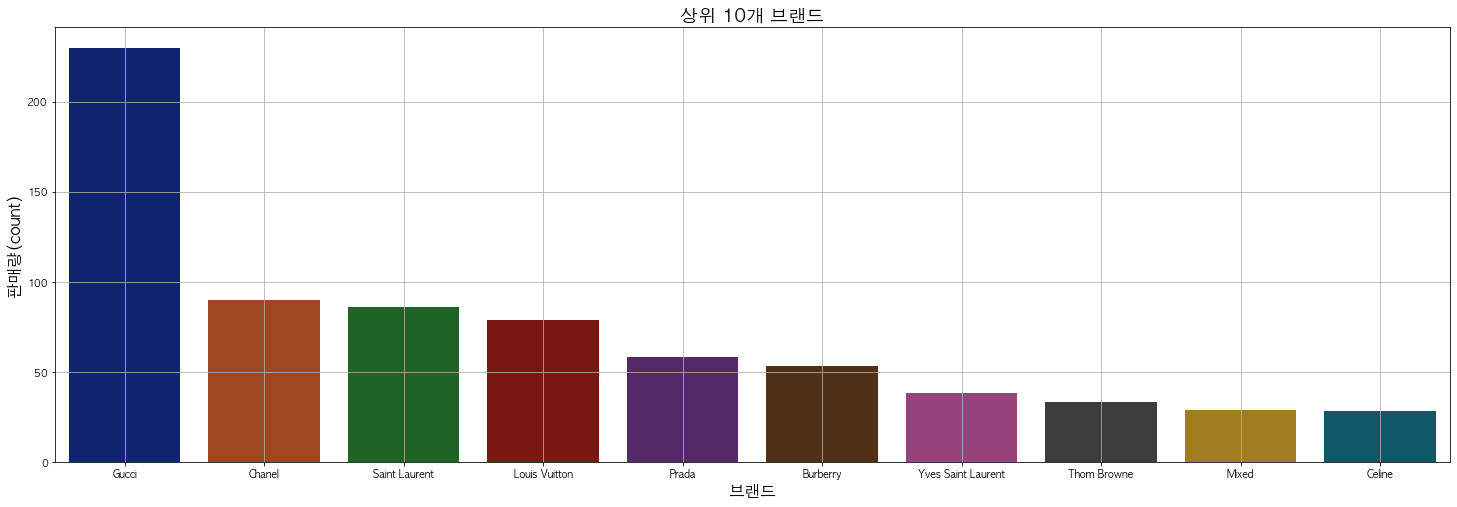

In [7]:
# plt.rcParams['font.family'] = 'HYGothic-Extra'

best_br = df.brandnm.value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(25,8))
sns.barplot(best_br.index, best_br.values, palette='dark')
plt.grid()
plt.title('상위 10개 브랜드', fontsize=18)
plt.ylabel('판매량(count)', fontsize=16)
plt.xlabel('브랜드', fontsize=16)
plt.show()

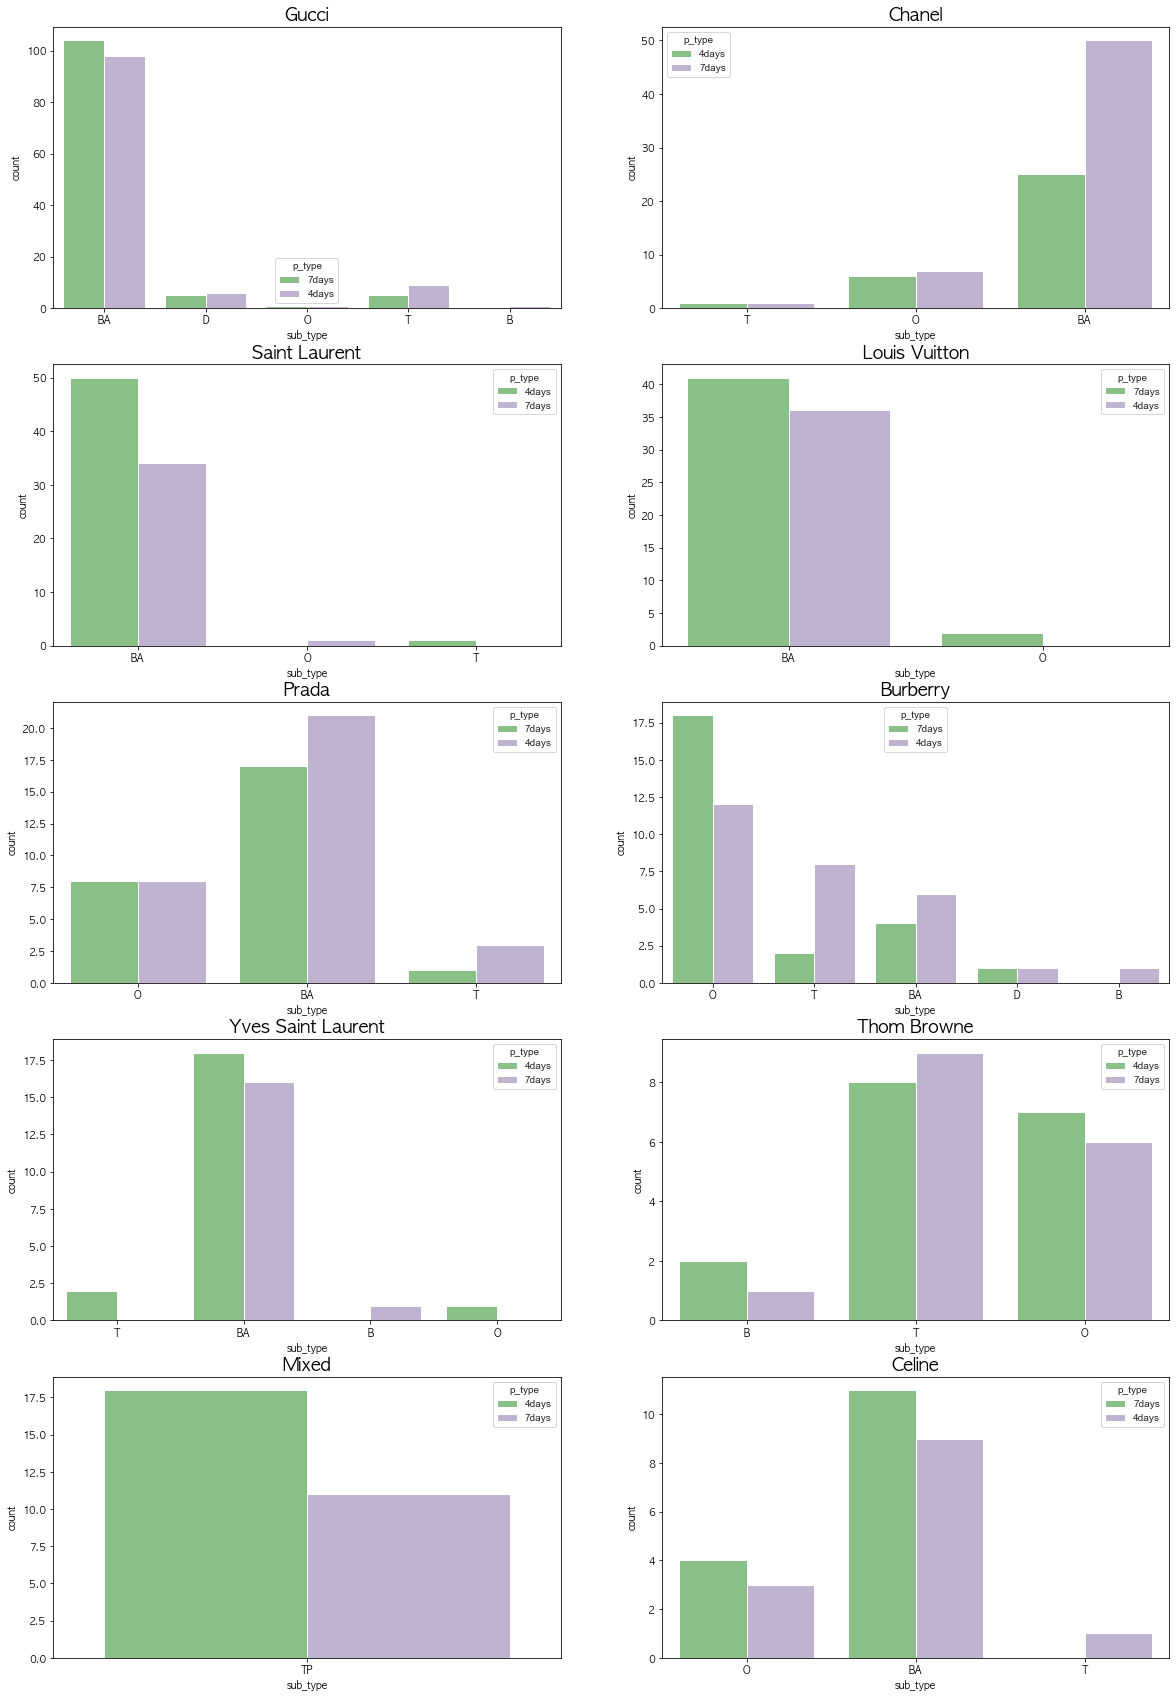

In [8]:
# 상위 10개 브랜드 sub_type 분포
# br = list(df.brandnm.value_counts().sort_values(ascending=False).head(30))
br = list(df.brandnm.value_counts().sort_values(ascending=False).head(10).index)

f, ax = plt.subplots(5,2 , figsize = (20,30))
axx = ax.flatten()
# plt.rcParams['font.family'] = 'HYGothic-Extra'

for axx2, j in zip(axx, br) :
    sns.set_style('whitegrid')
    plt.subplot(axx2)
    b_ca = df[df['brandnm'] == j]
    sns.countplot(data = b_ca, x= 'sub_type', hue='p_type', palette='Accent', ax= axx2)
    plt.title(j, fontsize = 18)

### - Top1 : Gucci 데이터만 따로 보기

In [31]:
# gucci 데이터만 따로 보기
gucci = df.query('brandnm == "Gucci"')[:]
gucci

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y,금요일,주중,1,406
8,Gucci,dionysus cross bag,a1143028,2021-01-14,2021-01-15,4days,BA,Y,금요일,주중,1,1
16,Gucci,microssima mini cross body bag pink,a1142921,2021-01-14,2021-01-14,4days,BA,Y,목요일,주중,1,0
34,Gucci,padlock GG canvas shoulder bag,a143862,2019-09-29,2021-01-14,4days,BA,Y,목요일,주중,1,473
36,Gucci,flap cross bag black,a1141099,2021-01-04,2021-01-13,4days,BA,Y,수요일,주중,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,Gucci,super mini sylvie white,a1144433,2021-01-25,2021-03-02,7days,BA,Y,화요일,주중,3,36
1447,Gucci,vintage web GG two way bag brown,a1117218,2020-08-30,2021-03-02,7days,BA,Y,화요일,주중,3,184
1451,Gucci,sylvie mini chain ribbon bag red,a1147961,2021-03-01,2021-03-01,4days,BA,Y,공휴일,휴일,3,0
1452,Gucci,microssima emily mini bag black,a1147942,2021-03-01,2021-03-01,7days,BA,Y,공휴일,휴일,3,0


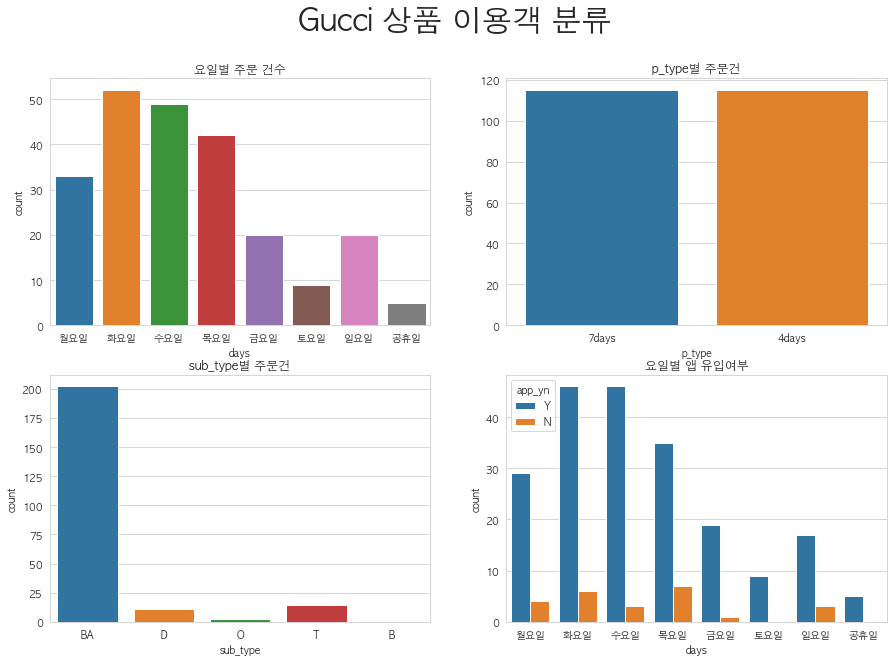

In [32]:
f, ax  = plt.subplots(2,2,figsize=(15,10))
# plt.rcParams['font.family'] = 'HYGothic-Extra'


plt.subplot(221)
sns.countplot(data=gucci, x='days',  
              order=['월요일','화요일','수요일','목요일','금요일','토요일','일요일', '공휴일'])
plt.title('요일별 주문 건수')

plt.subplot(222)
sns.countplot(data=gucci, x='p_type')
plt.title('p_type별 주문건')

plt.subplot(223)
sns.countplot(data=gucci, x='sub_type')
plt.title('sub_type별 주문건')

plt.subplot(224)
sns.countplot(data=gucci, x='days', hue='app_yn',
             order=['월요일','화요일','수요일','목요일','금요일','토요일','일요일', '공휴일'])
plt.title('요일별 앱 유입여부')

plt.suptitle('Gucci 상품 이용객 분류',fontsize=30, fontweight = 'bold')
plt.show()

### - Top2 : Chanel 데이터만 따로 보기

In [11]:
Chanel = df.query('brandnm == "Chanel"')[:]
Chanel

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
28,Chanel,brooch stripe pattern turtle neck turtleneck navy,a1136028,2020-12-09,2021-01-14,4days,T,Y,목요일,주중,1,36
58,Chanel,pocket tweed pattern cashmere coat pink,a1138513,2020-12-20,2021-01-11,4days,O,Y,월요일,주중,1,22
98,Chanel,classic chain shoulder bag black,a1141379,2021-01-06,2021-01-06,7days,BA,Y,수요일,주중,1,0
103,Chanel,pocket basic pattern wool fullzip-jacket grey,a1141288,2021-01-05,2021-01-06,4days,O,Y,수요일,주중,1,1
135,Chanel,pocket graphics pattern zipup-jumper navy,a1112031,2020-08-15,2021-01-01,7days,O,N,공휴일,휴일,1,139
...,...,...,...,...,...,...,...,...,...,...,...,...
1450,Chanel,stripe pattern pointed cardigan multi,a1147961,2021-03-01,2021-03-01,4days,O,Y,공휴일,휴일,3,0
1453,Chanel,boy chanel clutch black,a1147960,2021-03-01,2021-03-01,7days,BA,Y,공휴일,휴일,3,0
1455,Chanel,brooch check pattern jacket cream,a1146108,2021-02-11,2021-03-01,7days,O,Y,공휴일,휴일,3,18
1456,Chanel,pocket tweed pattern cashmere coat pink,a1147959,2021-03-01,2021-03-01,7days,O,N,공휴일,휴일,3,0


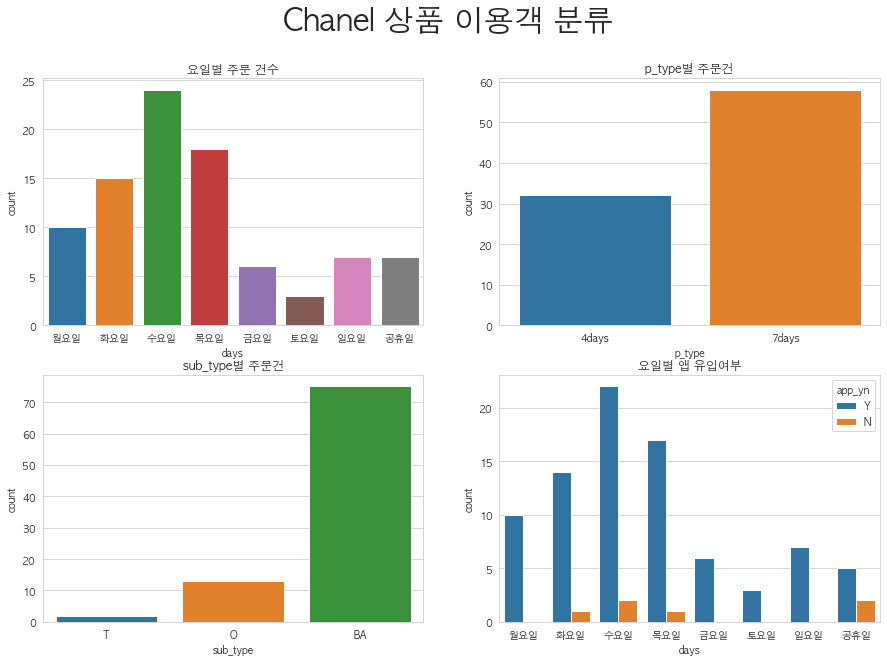

In [33]:
f, ax  = plt.subplots(2,2,figsize=(15,10))
# plt.rcParams['font.family'] = 'HYGothic-Extra'


plt.subplot(221)
sns.countplot(data=Chanel, x='days',
             order=['월요일','화요일','수요일','목요일','금요일','토요일','일요일', '공휴일'])
plt.title('요일별 주문 건수')

plt.subplot(222)
sns.countplot(data=Chanel, x='p_type')
plt.title('p_type별 주문건')

plt.subplot(223)
sns.countplot(data=Chanel, x='sub_type')
plt.title('sub_type별 주문건')

plt.subplot(224)
sns.countplot(data=Chanel, x='days', hue='app_yn',
             order=['월요일','화요일','수요일','목요일','금요일','토요일','일요일', '공휴일'])
plt.title('요일별 앱 유입여부')

plt.suptitle('Chanel 상품 이용객 분류',fontsize=30, fontweight = 'bold')
plt.show()

### - Top3 : Saint Laurent 데이터만 따로 보기

In [13]:
S_Laurent = df.query('brandnm == "Saint Laurent"')[:]
S_Laurent

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
45,Saint Laurent,chevron quilted cross bag black,a1140871,2021-01-02,2021-01-13,4days,BA,Y,수요일,주중,1,11
51,Saint Laurent,chevron quilted cross bag black,a1141925,2021-01-09,2021-01-12,4days,BA,Y,화요일,주중,1,3
56,Saint Laurent,mini sunset chain bag black,a1142471,2021-01-12,2021-01-12,7days,BA,Y,화요일,주중,1,0
67,Saint Laurent,button basic pattern blazer black,a1140758,2021-01-01,2021-01-10,7days,O,Y,일요일,휴일,1,9
115,Saint Laurent,quilted calfskin shoulder bag,a1139320,2020-12-22,2021-01-05,7days,BA,Y,화요일,주중,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...
1311,Saint Laurent,chevron quilted cross bag black,a1135400,2020-12-05,2021-03-09,4days,BA,Y,화요일,주중,3,94
1320,Saint Laurent,monogram mini universal bag black,a1148747,2021-03-09,2021-03-09,7days,BA,Y,화요일,주중,3,0
1357,Saint Laurent,chevron quilted cross bag black,a1148129,2021-03-03,2021-03-06,7days,BA,N,토요일,휴일,3,3
1377,Saint Laurent,quilted calfskin shoulder bag,a1148237,2021-03-04,2021-03-04,4days,BA,N,목요일,주중,3,0


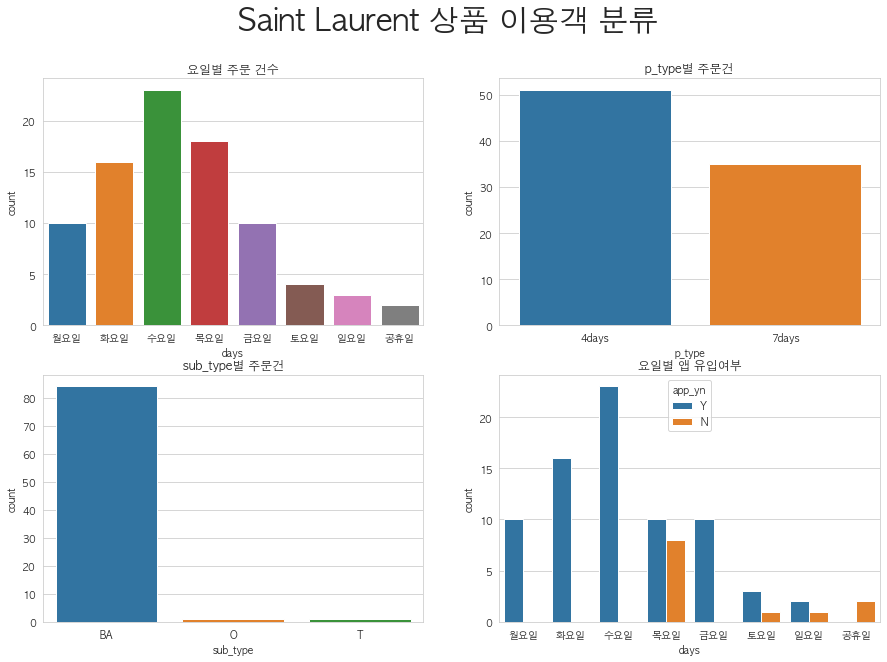

In [34]:
f, ax  = plt.subplots(2,2,figsize=(15,10))
# plt.rcParams['font.family'] = 'HYGothic-Extra'


plt.subplot(221)
sns.countplot(data=S_Laurent, x='days',
             order=['월요일','화요일','수요일','목요일','금요일','토요일','일요일', '공휴일'])
plt.title('요일별 주문 건수')

plt.subplot(222)
sns.countplot(data=S_Laurent, x='p_type')
plt.title('p_type별 주문건')

plt.subplot(223)
sns.countplot(data=S_Laurent, x='sub_type')
plt.title('sub_type별 주문건')

plt.subplot(224)
sns.countplot(data=S_Laurent, x='days', hue='app_yn',
             order=['월요일','화요일','수요일','목요일','금요일','토요일','일요일', '공휴일'])
plt.title('요일별 앱 유입여부')

plt.suptitle('Saint Laurent 상품 이용객 분류',fontsize=30, fontweight = 'bold')
plt.show()

### - Top4 : Louis Vuitton 데이터만 따로 보기

In [15]:
Louis_Vuitton = df.query('brandnm == "Louis Vuitton"')[:]
Louis_Vuitton

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
10,Louis Vuitton,twist monogram patent shoulder bag black,a1140216,2020-12-28,2021-01-15,7days,BA,Y,금요일,주중,1,18
44,Louis Vuitton,monogram shoulder bag black,a164734,2019-12-13,2021-01-13,4days,BA,Y,수요일,주중,1,397
73,Louis Vuitton,alma epi pm tote bag black,a1141816,2021-01-09,2021-01-09,7days,BA,Y,토요일,휴일,1,0
91,Louis Vuitton,monogram clutch brown,a1141530,2021-01-07,2021-01-07,7days,BA,Y,목요일,주중,1,0
144,Louis Vuitton,logo chain tote bag black,a1144704,2021-01-27,2021-01-30,4days,BA,Y,토요일,휴일,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1325,Louis Vuitton,verni mini clutch chain bag brown,a1138484,2020-12-20,2021-03-09,7days,BA,Y,화요일,주중,3,79
1332,Louis Vuitton,monogram clutch brown,a1148708,2021-03-09,2021-03-09,4days,BA,Y,화요일,주중,3,0
1384,Louis Vuitton,galliera gm Shoulder hobo Bag white,a1148221,2021-03-04,2021-03-04,7days,BA,Y,목요일,주중,3,0
1417,Louis Vuitton,Pochette trunk vertical black bag,a1148115,2021-03-03,2021-03-03,4days,BA,Y,수요일,주중,3,0


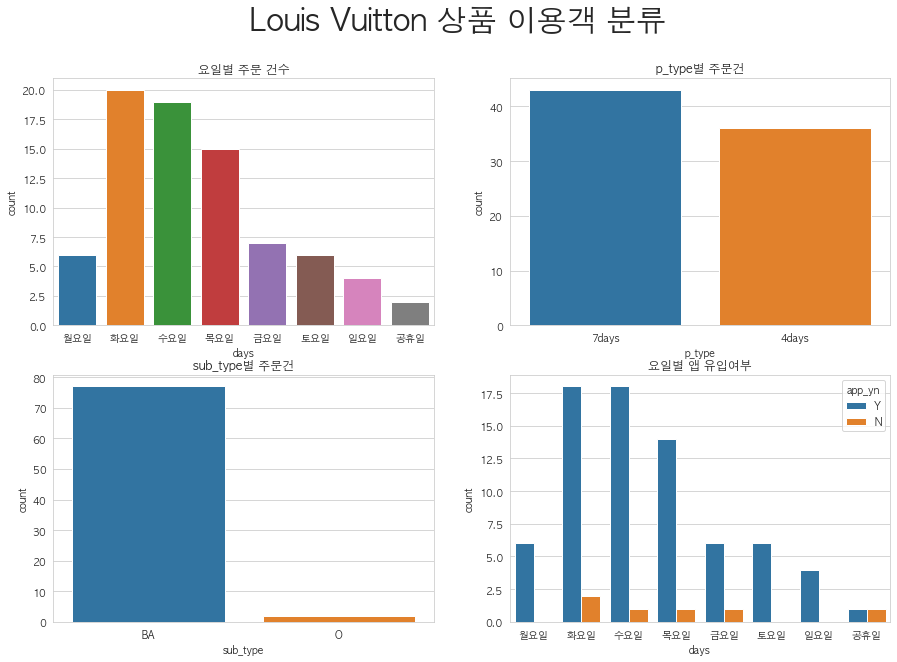

In [35]:
f, ax  = plt.subplots(2,2,figsize=(15,10))
# plt.rcParams['font.family'] = 'HYGothic-Extra'


plt.subplot(221)
sns.countplot(data=Louis_Vuitton, x='days',
             order=['월요일','화요일','수요일','목요일','금요일','토요일','일요일', '공휴일'])
plt.title('요일별 주문 건수')

plt.subplot(222)
sns.countplot(data=Louis_Vuitton, x='p_type')
plt.title('p_type별 주문건')

plt.subplot(223)
sns.countplot(data=Louis_Vuitton, x='sub_type')
plt.title('sub_type별 주문건')

plt.subplot(224)
sns.countplot(data=Louis_Vuitton, x='days', hue='app_yn',
             order=['월요일','화요일','수요일','목요일','금요일','토요일','일요일', '공휴일'])
plt.title('요일별 앱 유입여부')

plt.suptitle('Louis Vuitton 상품 이용객 분류',fontsize=30, fontweight = 'bold')
plt.show()

### - Top5 : Prada 데이터만 따로 보기

In [17]:
Prada = df.query('brandnm == "Prada"')[:]
Prada

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
5,Prada,ruffle detail long coat,a110231,2018-10-18,2021-01-15,7days,O,Y,금요일,주중,1,820
12,Prada,color fur detail coat black,a1137815,2020-12-18,2021-01-15,7days,O,Y,금요일,주중,1,28
13,Prada,zipper detail cape padding jumper,a1135135,2020-12-04,2021-01-15,7days,O,Y,금요일,주중,1,42
15,Prada,logo hobo bag black,a1143143,2021-01-15,2021-01-15,4days,BA,Y,금요일,주중,1,0
30,Prada,quilted cross body bag black,a1142924,2021-01-14,2021-01-14,4days,BA,Y,목요일,주중,1,0
37,Prada,single button modern coat black,a1142328,2021-01-11,2021-01-13,4days,O,Y,수요일,주중,1,2
48,Prada,collar point long coat multi,a189599,2020-03-22,2021-01-13,7days,O,Y,수요일,주중,1,297
53,Prada,button check pattern wool singlebreasted-jacke...,a1120719,2020-09-21,2021-01-12,4days,O,Y,화요일,주중,1,113
123,Prada,padding two way bag black,a1141018,2021-01-04,2021-01-04,4days,BA,Y,월요일,주중,1,0
171,Prada,logo hobo bag black,a1135097,2020-12-04,2021-01-28,4days,BA,Y,목요일,주중,1,55


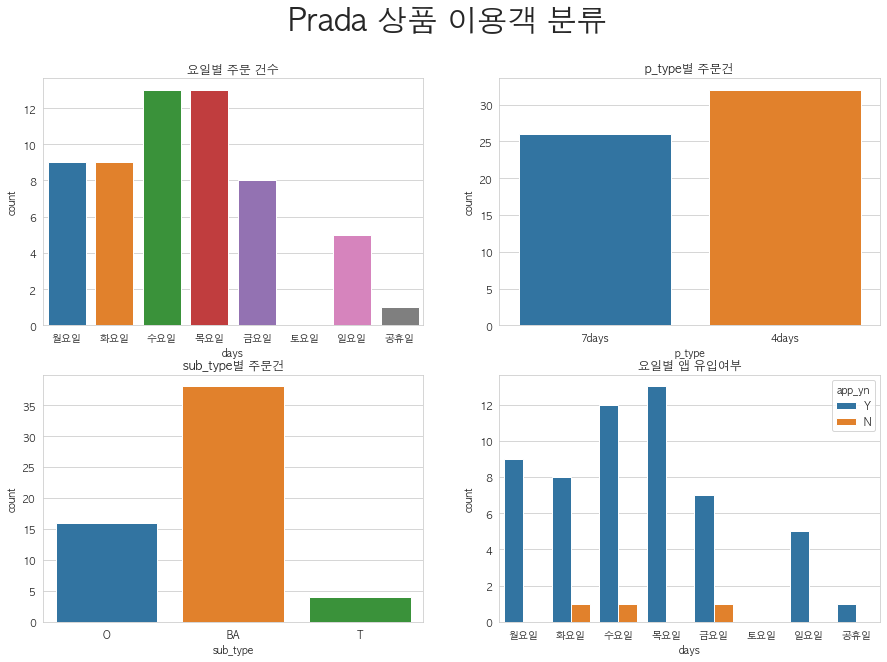

In [36]:
f, ax  = plt.subplots(2,2,figsize=(15,10))
# plt.rcParams['font.family'] = 'HYGothic-Extra'

plt.subplot(221)
sns.countplot(data=Prada, x='days',
             order=['월요일','화요일','수요일','목요일','금요일','토요일','일요일', '공휴일'])
plt.title('요일별 주문 건수')

plt.subplot(222)
sns.countplot(data=Prada, x='p_type')
plt.title('p_type별 주문건')

plt.subplot(223)
sns.countplot(data=Prada, x='sub_type')
plt.title('sub_type별 주문건')

plt.subplot(224)
sns.countplot(data=Prada, x='days', hue='app_yn',
             order=['월요일','화요일','수요일','목요일','금요일','토요일','일요일', '공휴일'])
plt.title('요일별 앱 유입여부')

plt.suptitle('Prada 상품 이용객 분류',fontsize=30, fontweight = 'bold')
plt.show()

### 2. 전체 아이템 중 선호도가 높은 순위 기준

In [19]:
# 개별 아이템별 선호도 상품 분석 

best_item = list(df.goodsnm.value_counts().head(11).index)
cnt = list(df.goodsnm.value_counts().head(11).values)

In [20]:
for i in range(len(best_item)):
    bname = df[df.goodsnm == best_item[i]]['brandnm'].unique()
    print(bname, ':', best_item[i], '주문수량', cnt[i])

['Saint Laurent'] : chevron quilted cross bag black 주문수량 23
['Chanel'] : classic clutch black 주문수량 12
['Chanel'] : boy chanel clutch black 주문수량 11
['Gucci'] : padlock GG canvas shoulder bag 주문수량 9
['Gucci'] : dionysus shoulder bag beige 주문수량 8
['Louis Vuitton'] : epi tote bag black 주문수량 8
['Saint Laurent'] : mini sunset chain bag black 주문수량 8
['Gucci'] : dionysus cross bag beige 주문수량 7
['Louis Vuitton'] : monogram clutch brown 주문수량 7
['Saint Laurent' 'Chanel'] : quilted shoulder bag black 주문수량 7
['Gucci'] : flap cross bag black 주문수량 7


In [21]:
# 월별/요일별/ 개별 아이템 사진첨부 

# 상위 아이템 분석

- ['Saint Laurent'] : chevron quilted cross bag black 주문수량 23
- ['Chanel'] : classic clutch black 주문수량 12
- ['Chanel'] : boy chanel clutch black 주문수량 11

In [22]:
cross_bag = df.query('goodsnm == "chevron quilted cross bag black"')
cluth_black = df.query('goodsnm == "classic clutch black"')
chanel_cluth = df.query('goodsnm == "boy chanel clutch black"')

## 월별 count

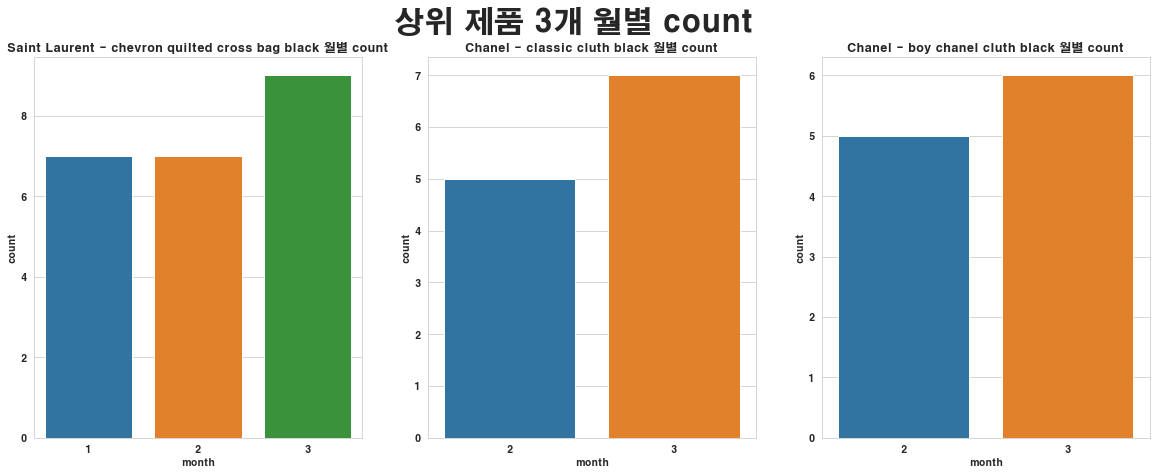

In [23]:
plt.figure(figsize=(20,7))
plt.rcParams['font.family'] = 'HYGothic-Extra'

plt.subplot(131)
sns.countplot(data=cross_bag, x='month')
plt.title('Saint Laurent - chevron quilted cross bag black 월별 count')

plt.subplot(132)
sns.countplot(data=cluth_black, x='month')
plt.title('Chanel - classic cluth black 월별 count')

plt.subplot(133)
sns.countplot(data=chanel_cluth, x='month')
plt.title('Chanel - boy chanel cluth black 월별 count')

plt.suptitle('상위 제품 3개 월별 count',fontsize=30, fontweight = 'bold')
plt.show()

- 생로랑은 1 = 2 < 3월
- 샤넬은 1월달 데이터가 없음. 두 제품 모두 2 < 3
    - 그렇다면 chanel 제품들은 2월에 업데이트 된 상품이 아닐까? 라는 추측을 해봄

## 요일별 count

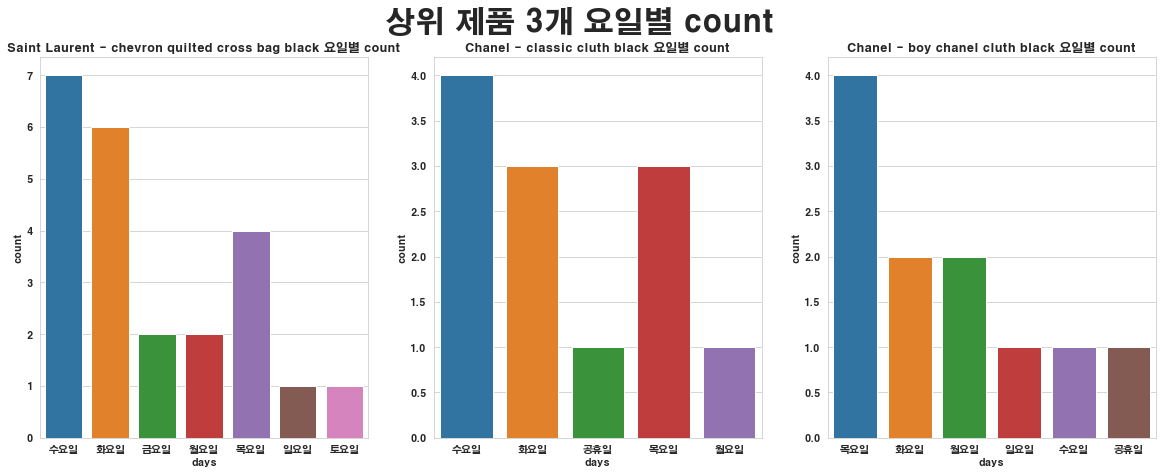

In [24]:
#요일별 아이템 분석

plt.figure(figsize=(20,7))
plt.rcParams['font.family'] = 'HYGothic-Extra'

plt.subplot(131)
sns.countplot(data=cross_bag, x='days')
plt.title('Saint Laurent - chevron quilted cross bag black 요일별 count')

plt.subplot(132)
sns.countplot(data=cluth_black, x='days')
plt.title('Chanel - classic cluth black 요일별 count')

plt.subplot(133)
sns.countplot(data=chanel_cluth, x='days')
plt.title('Chanel - boy chanel cluth black 요일별 count')

plt.suptitle('상위 제품 3개 요일별 count',fontsize=30, fontweight = 'bold')
plt.show()

## 주중/휴일별 아이템 분석

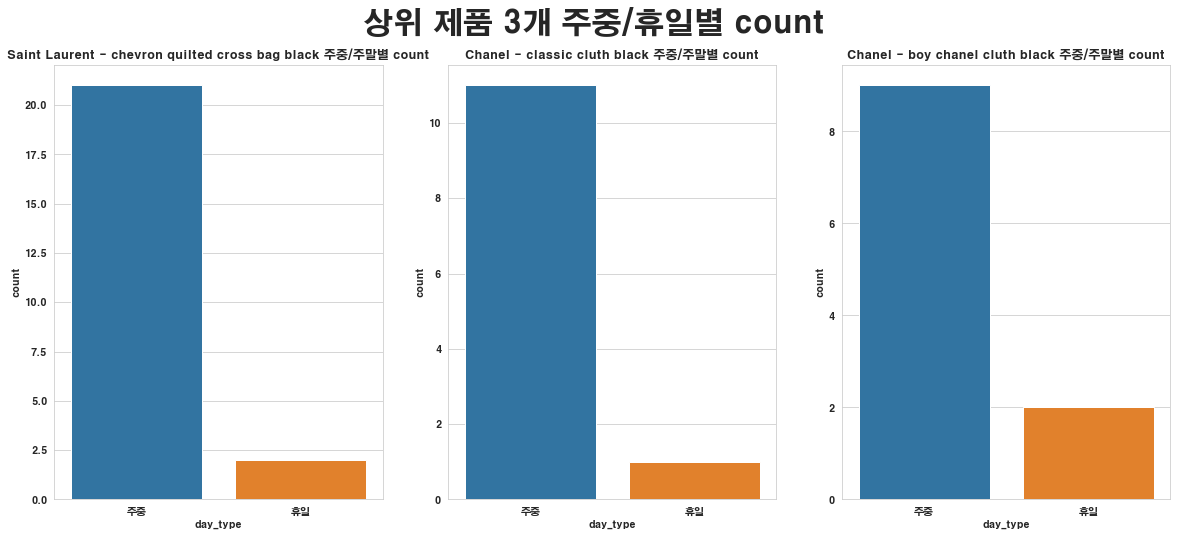

In [25]:
plt.figure(figsize=(20,8))
plt.rcParams['font.family'] = 'HYGothic-Extra'

plt.subplot(131)
sns.countplot(data=cross_bag, x='day_type')
plt.title('Saint Laurent - chevron quilted cross bag black 주중/주말별 count')

plt.subplot(132)
sns.countplot(data=cluth_black, x='day_type')
plt.title('Chanel - classic cluth black 주중/주말별 count')

plt.subplot(133)
sns.countplot(data=chanel_cluth, x='day_type')
plt.title('Chanel - boy chanel cluth black 주중/주말별 count')

plt.suptitle('상위 제품 3개 주중/휴일별 count',fontsize=30, fontweight = 'bold')
plt.show()

## 가입 후 기간별 아이템 분석

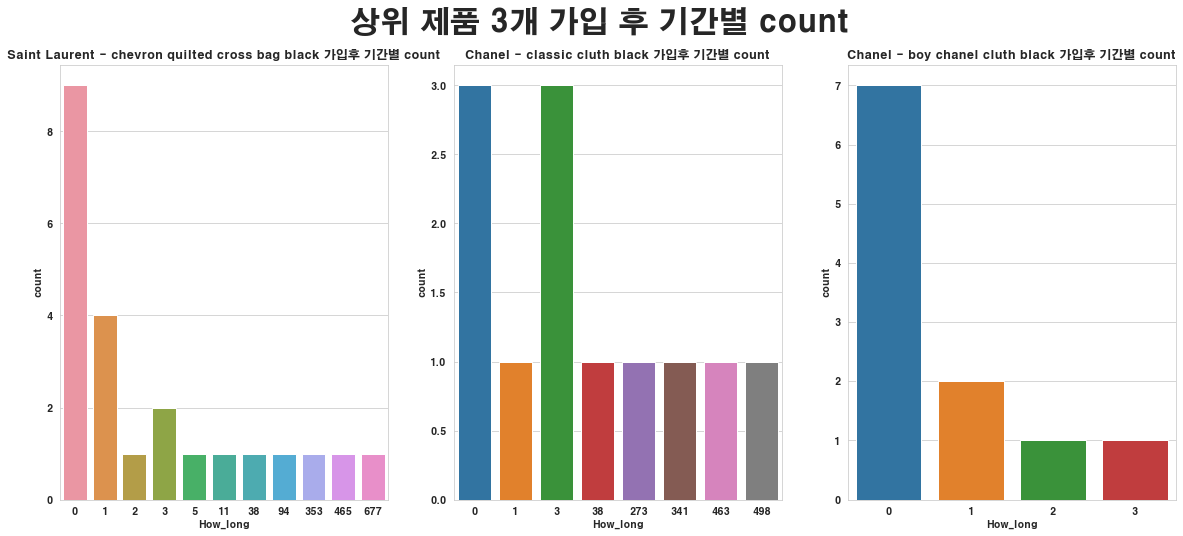

In [26]:
plt.figure(figsize=(20,8))
plt.rcParams['font.family'] = 'HYGothic-Extra'

plt.subplot(131)
sns.countplot(data=cross_bag, x='How_long')
plt.title('Saint Laurent - chevron quilted cross bag black 가입후 기간별 count')

plt.subplot(132)
sns.countplot(data=cluth_black, x='How_long')
plt.title('Chanel - classic cluth black 가입후 기간별 count')

plt.subplot(133)
sns.countplot(data=chanel_cluth, x='How_long')
plt.title('Chanel - boy chanel cluth black 가입후 기간별 count')

plt.suptitle('상위 제품 3개 가입 후 기간별 count',fontsize=30, fontweight = 'bold')
plt.show()

- 대부분이 가입 당일 혹은 1일 이내에 빌림

In [27]:
print(cluth_black[cluth_black['How_long'] > 1]['order_date'], '\n')
print(cluth_black[cluth_black['How_long'] > 1]['order_date'].min())

464     2021-02-24
649     2021-02-13
741     2021-02-04
839     2021-03-31
973     2021-03-25
978     2021-03-24
1309    2021-03-09
1333    2021-03-09
Name: order_date, dtype: object 

2021-02-04


In [28]:
print(chanel_cluth[chanel_cluth['How_long'] > 1]['order_date'], '\n')
print(chanel_cluth[chanel_cluth['How_long'] > 1]['order_date'].min())

750     2021-02-04
1192    2021-03-16
Name: order_date, dtype: object 

2021-02-04


### idea?

- 아까 위에서 chanel 제품들은 2월에 들어온 상품이 아닐까? 란 가정을 세웠는데,<br> 가입한 지 꽤 된 유저들의 구매일자를 확인해보니 모두 2,3월임 이 중 가장 빠른 결제일이 **2월 4일**
- 샤넬의 두 번째 제품도 마찬가지임. 가장 빠른 결제일이 **2월 4일**
- **상위 제품 2,3위인 샤넬의 제품은 2월에 업데이트 된 것으로 판단**
    - 신상에 대한 욕구 有?
        - 이게 진짜 시즌 신상인지, 아니면 클로젯 셰어 내에서의 신상일지 판단 확인 필요
        - 클로젯 셰어에서 검색한 결과, 동일 제품인데 new 라벨이 붙어있는 제품 존재. **클로젯 셰어 내부에서의 신상(재고가 추가됨)으로 판단**
        
- 상위 3개 제품의 디자인은 모두 **베이직한 디자인**임. 게다가 모두 **검정색**
    - *클로젯 셰어 인스타그램에 베스트 셀러 bags들을 모아놨는데 ..... 음.. 어떻게 연결지을 수 있을까요*
    - 클로젯 셰어 인스타그램 주소 : https://www.instagram.com/closetshare_kr/
        - 게시글 보려면 로그인 필수

## 일회권 별 count

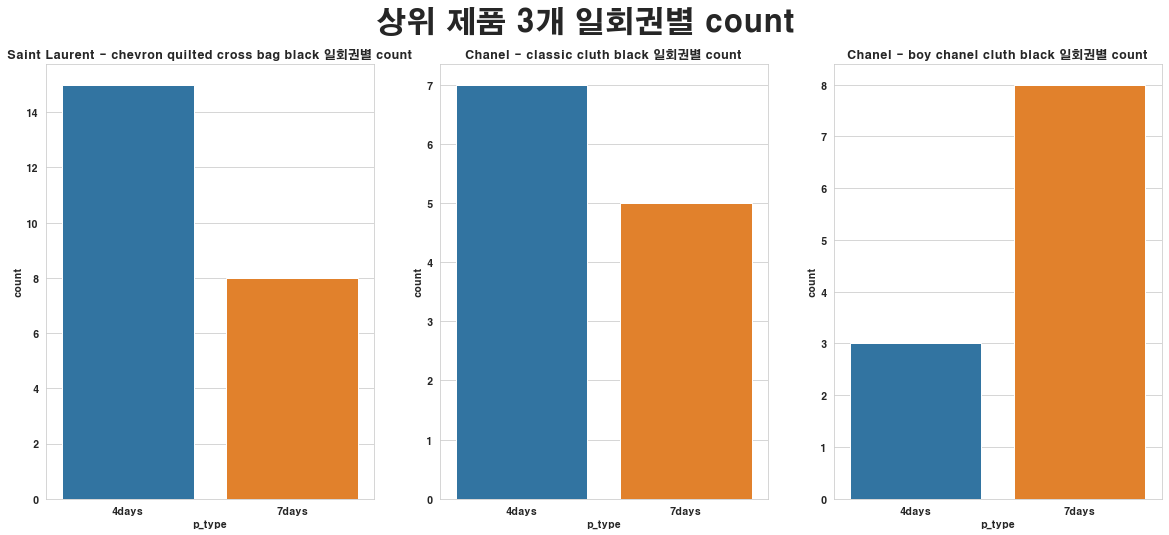

In [29]:
#요일별 아이템 분석

plt.figure(figsize=(20,8))
plt.rcParams['font.family'] = 'HYGothic-Extra'

plt.subplot(131)
sns.countplot(data=cross_bag, x='p_type')
plt.title('Saint Laurent - chevron quilted cross bag black 일회권별 count')

plt.subplot(132)
sns.countplot(data=cluth_black, x='p_type')
plt.title('Chanel - classic cluth black 일회권별 count')

plt.subplot(133)
sns.countplot(data=chanel_cluth, x='p_type')
plt.title('Chanel - boy chanel cluth black 일회권별 count')

plt.suptitle('상위 제품 3개 일회권별 count',fontsize=30, fontweight = 'bold')
plt.show()

- 생로랑과 샤넬 classicd cluth black 제품은 4days가 많고, boy chanel cluth black은 7days가 많음
    - 같은 브랜드의 아이템인데 왜 차이가 있을까?
        - chanel classic clutch black : 39000/49000원 多 (15개 존재)
        - boy chanel cluth black : 49000/59000 (1개 존재)
           - 가격은 비슷한데? 재고 수의 차이 때문일까?